<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1010%EC%9B%94%EC%84%B8%EC%85%98_AppleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [4]:
apple = data

### Step 4.  Check out the type of the columns

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [57]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',
                    sep=',',
                    parse_dates=[0])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [ ]:
from datetime import datetime
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [3]:
apple.index=apple['Date']

In [68]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [11]:
apple['Date'][apple['Date'].duplicated()==True]

Series([], Name: Date, dtype: datetime64[ns])

In [14]:
(apple['Date'].duplicated()==True).sum()

0

In [7]:
len(apple.index)==len(set(apple.index))
# set : 중복된걸 지움

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [15]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
apple.sort_index() # 인덱스 기준 오름차순 정렬

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [11]:
import calendar
  
year, month = apple['Date'].dt.year[0], apple['Date'].dt.month[0]
last_day = calendar.monthrange(year,month)
print(last_day)

(1, 31)


In [21]:
calendar.monthrange(2022,10)

(5, 31)

In [25]:
import calendar

last_day = []

for i in range(len(apple['Date'])):
  year, month = apple['Date'].dt.year[i], apple['Date'].dt.month[i]
  last_day.append(calendar.monthrange(year,month)[1])

a= pd.DataFrame({'month':apple['Date'].dt.month,'lastday':last_day})
print(a)

# 중복된 달 그루핑이 안되서 적절치 x

            month  lastday
Date                      
2014-07-08      7       31
2014-07-07      7       31
2014-07-03      7       31
2014-07-02      7       31
2014-07-01      7       31
...           ...      ...
1980-12-18     12       31
1980-12-17     12       31
1980-12-16     12       31
1980-12-15     12       31
1980-12-12     12       31

[8465 rows x 2 columns]


In [19]:
apple['mon']=apple.index.month
apple['day']=apple.index.day
apple.groupby(by='mon').max('day')['day']

mon
1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day, dtype: int64

### Step 10.  What is the difference in days between the first day and the oldest

In [5]:
diff = apple['Date'].max() - apple['Date'].min()
print(diff)

# max:가장 최신, min:가장 오래전

12261 days 00:00:00


In [6]:
apple.index[-1]-apple.index[0]

Timedelta('-12261 days +00:00:00')

### Step 11.  How many months in the data we have?

In [27]:
apple.Date.dt.month.value_counts()

3     744
8     730
10    728
6     727
5     718
12    711
1     705
7     703
4     703
11    675
9     669
2     652
Name: Date, dtype: int64

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

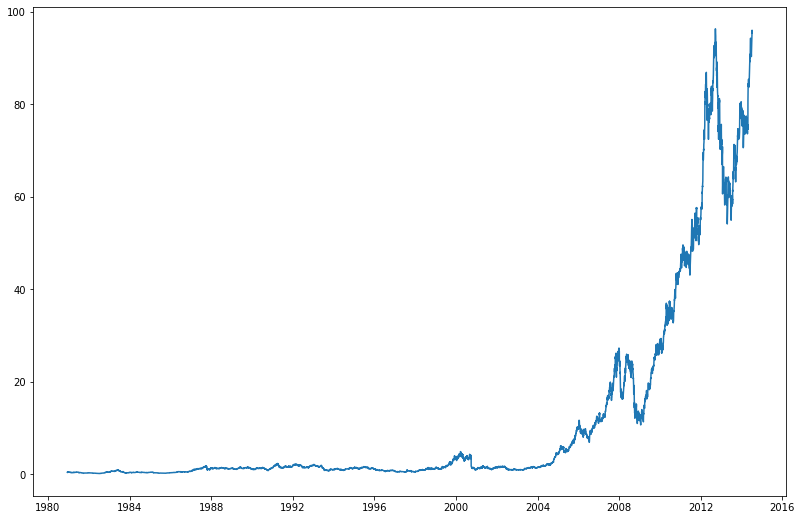

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])
# 시계열 플랏으로 그려짐

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <a list of 10 Patch objects>)

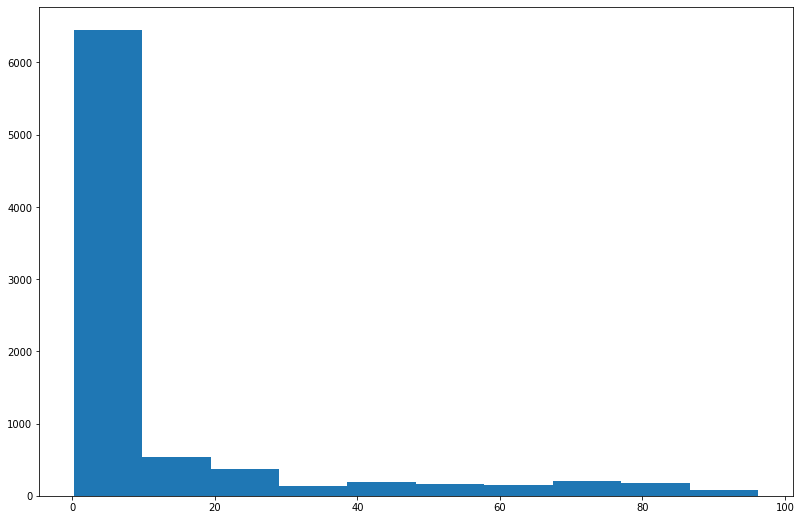

In [28]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple['Adj Close'])
# 히스토그램으로

### BONUS: Create your own question and answer it.